# Relatório de Análise VII

## Criando agrupamentos

In [1]:
# Importando Pandas e banco de dados atualizado da última aula
import pandas as pd

dados = pd.read_csv('dados/aluguel_residencial_2.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor/m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [3]:
# Obtendo a média da coluna 'Valor'
dados['Valor'].mean()

5046.172821405663

In [4]:
# Selecionando alguns bairros específicos para calcular a média por Bairro da coluna 'Valor'. Para calcular a média paa todos
# os bairros, basta comentar esta célula.
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [6]:
# Conferindo se os bairros foram selecionados corretamente
dados['Bairro'].unique()

array(['Copacabana', 'Barra da Tijuca', 'Tijuca', 'Ipanema', 'Botafogo',
       'Leblon', 'Flamengo'], dtype=object)

In [7]:
# Criando um agrupamento pela coluna 'Bairro'
grupo_bairro = dados.groupby('Bairro')

In [8]:
# Verificando o tipo do agrupamento
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [16]:
# Quando analisamos os dados por meio do método type(), verificaremos que temo um DataFrame para cada bairro. Agora extrairemos
# o valor médio com base em nossa lista de bairros: 
for bairro, dados in grupo_bairro: 
    print('Média dos valores dos imóveis em {} : {}'.format(bairro, dados.Valor.mean()))

Média dos valores dos imóveis em Barra da Tijuca : 7069.552938130986
Média dos valores dos imóveis em Botafogo : 8791.828178694159
Média dos valores dos imóveis em Copacabana : 4126.677004538578
Média dos valores dos imóveis em Flamengo : 4113.526610644258
Média dos valores dos imóveis em Ipanema : 9352.001133786847
Média dos valores dos imóveis em Leblon : 8746.344992050874
Média dos valores dos imóveis em Tijuca : 2043.52


In [13]:
# Uma alternativa mais simples para obter o mesmo resultado
grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    7069.55
Botafogo           8791.83
Copacabana         4126.68
Flamengo           4113.53
Ipanema            9352.00
Leblon             8746.34
Tijuca             2043.52
Name: Valor, dtype: float64

In [18]:
# É possível passar mais de m valor, resultando em um dataframe
grupo_bairro[['Valor', 'Condominio', 'IPTU']].mean().round(2)

,Valor,Condominio,IPTU
Bairro,,,
Barra da Tijuca,7069.55,3591.01,1510.81
Botafogo,8791.83,976.28,260.39
Copacabana,4126.68,1148.68,383.26
Flamengo,4113.53,1102.15,292.77
Ipanema,9352.00,2244.44,759.94
Leblon,8746.34,2107.18,757.57
Tijuca,2043.52,711.69,173.82


## Estatísticas Descritivas

In [19]:
# O método describe() fornece algumas estatísticas descritivas sobre nossas variáveis de interesse: count a frequência; 
# mean a média; std o desvio padrão; mino valor mínimo; 25% o primeiro quartio, 50% a mediana, 75% o terceiro quartio e max, 
# o valor máximo. 
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [20]:
#  O método aggregate() recebe como parâmetro o conjunto de estatísticas que nos interessam. 
grupo_bairro['Valor'].aggregate(['min','max','sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [23]:
# Renomeando as colunas
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [25]:
# Importando Matlib. A primeira linhas faz com que os gráficos possam ser visualizados no Jupyter Notebook. 
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
# Configurando o tamanho da figura
plt.rc('figure', figsize=(20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

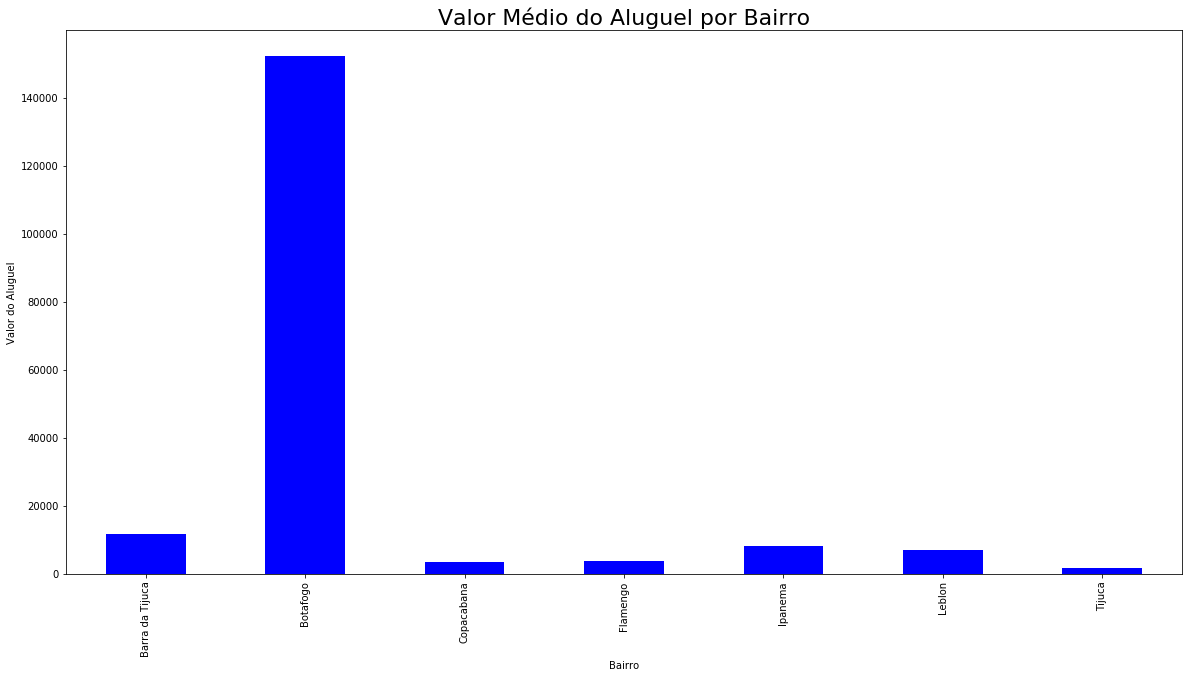

In [29]:
# Construindo um gráfico de barras com o desvio padrão da variável 'Valor' no agrupamento grupo_bairro
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

### Claramente, o desvio padrão em Botafogo está muito alto. Há incoerências nos dados deste bairro.